In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:\\Users\\rupik\\Downloads\\retail_sales\\Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Introduce a stronger correlation between Discount and Sales
# Increase the multiplier associated with Discount to strengthen correlation
np.random.seed(42)  # For reproducibility
df['Sales'] = df['Sales'] * (1 + df['Discount'] * 1.5 + np.random.normal(0, 0.1, len(df)))

# Verify the new correlation
correlation = df[['Discount', 'Sales']].corr().iloc[0, 1]
print(f"New correlation between Discount and Sales: {correlation:.2f}")

# Save the modified data back to CSV
df.to_csv('modified_sales_data.csv', index=False)


New correlation between Discount and Sales: 0.20


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\rupik\\Downloads\\DE\\modified_sales_data.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1542.007955,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,940.874004,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,3256.254495,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,1368.463475,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,3218.306880,0.26,918.45,Tamil Nadu


In [7]:
df['Order Date']


0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, Length: 9994, dtype: object

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [10]:
df.dropna(subset=['Sales', 'Discount', 'Profit', 'Category', 'Sub Category'], inplace=True)

In [11]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [12]:
Q1 = df[['Sales', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Sales', 'Profit']] < (Q1 - 1.5 * IQR)) |(df[['Sales', 'Profit']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

In [14]:
sales_by_category = df.groupby(['Category', 'Sub Category'])['Sales'].sum().sort_values(ascending=False)

In [15]:
sales_over_time = df.groupby('Order Date')['Sales'].sum()

In [16]:
total_sales_by_product = df.groupby('Sub Category')['Sales'].sum()
avg_sales_by_product = df.groupby('Sub Category')['Sales'].mean()

In [17]:
best_performing_store = sales_by_city.idxmax()
highest_sales = sales_by_city.max()
print(f"Best performing store: {best_performing_store} with sales: {highest_sales}")

Best performing store: Kanyakumari with sales: 942627.4047362753


In [18]:
discount_sales_correlation = df[['Discount', 'Sales']].corr().iloc[0, 1]
print(f"Correlation between Discount and Sales: {discount_sales_correlation:.2f}")

Correlation between Discount and Sales: 0.20


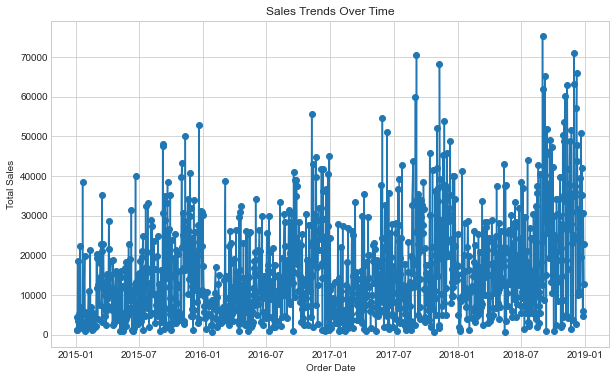

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

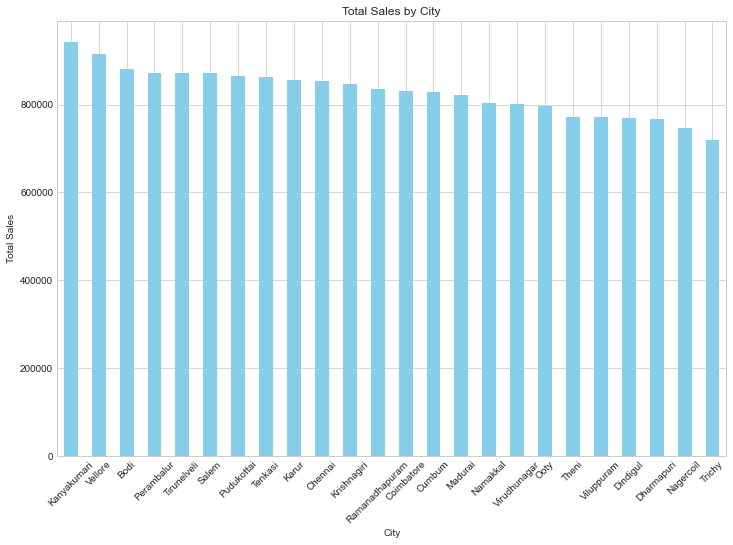

In [21]:
plt.figure(figsize=(12, 8))
sales_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<Figure size 1008x720 with 0 Axes>

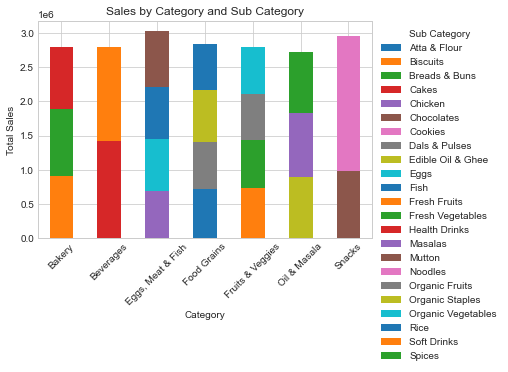

In [24]:
plt.figure(figsize=(14, 10))
sales_by_category.unstack().plot(kind='bar', stacked=True)
plt.title('Sales by Category and Sub Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Sub Category',loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.show()

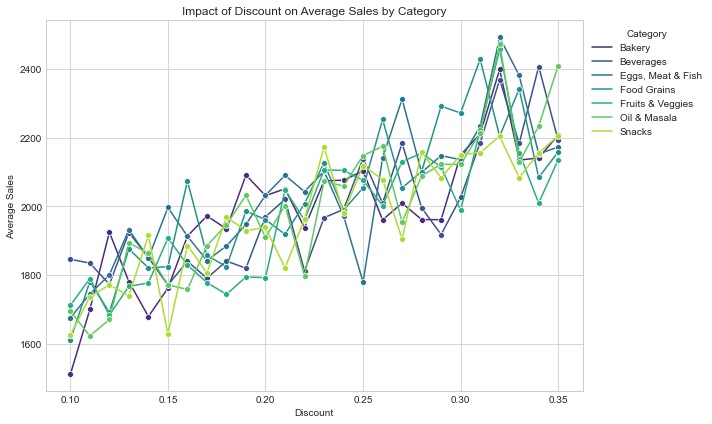

In [ ]:
plt.figure(figsize=(10, 6))
agg_df = df.groupby(['Discount', 'Category']).agg({'Sales': 'mean'}).reset_index()
sns.lineplot(x='Discount', y='Sales', hue='Category', data=agg_df, marker='o', palette='viridis')
plt.title('Impact of Discount on Average Sales by Category')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

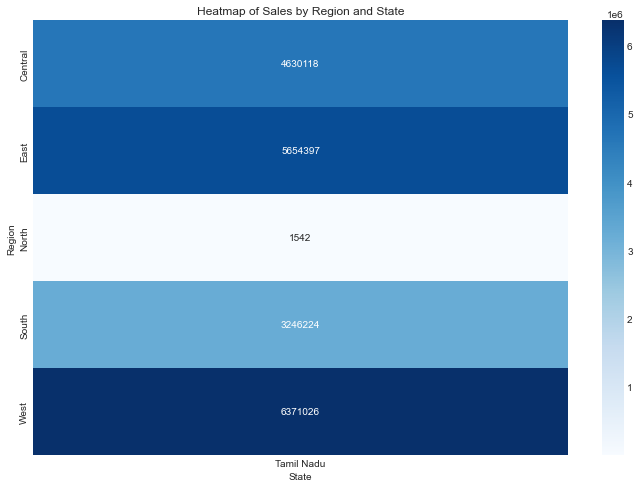

In [28]:
region_state_sales = df.groupby(['Region', 'State'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(region_state_sales, cmap='Blues', annot=True, fmt=".0f")
plt.title('Heatmap of Sales by Region and State')
plt.xlabel('State')
plt.ylabel('Region')
plt.show()

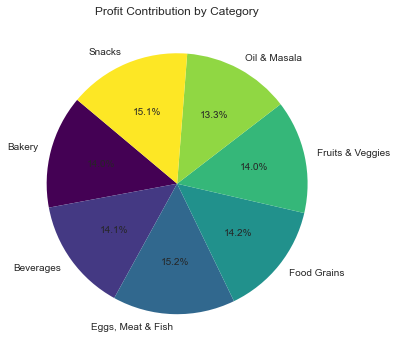

In [27]:
plt.figure(figsize=(10, 6))
profit_by_category = df.groupby('Category')['Profit'].sum()
profit_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Profit Contribution by Category')
plt.ylabel('')  
plt.show()


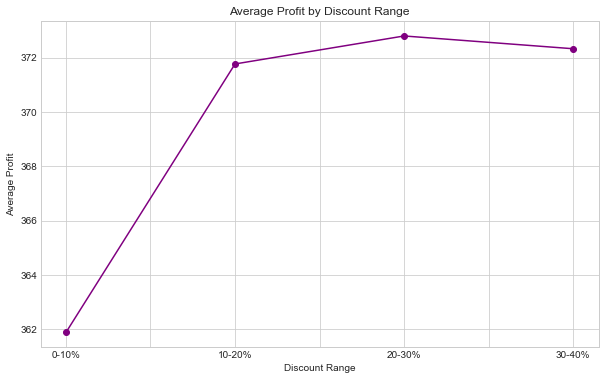

In [29]:
df['Discount Range'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'])
avg_profit_by_discount = df.groupby('Discount Range')['Profit'].mean()
plt.figure(figsize=(10, 6))
avg_profit_by_discount.plot(kind='line', marker='o', color='purple')
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()